In [1]:
# impoprt library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
#print head of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

## Step 2: Cleaning the data

### 1- Age and cabin has NaN values; 177 and 687 respectively. and has Embarked 2.

<AxesSubplot:>

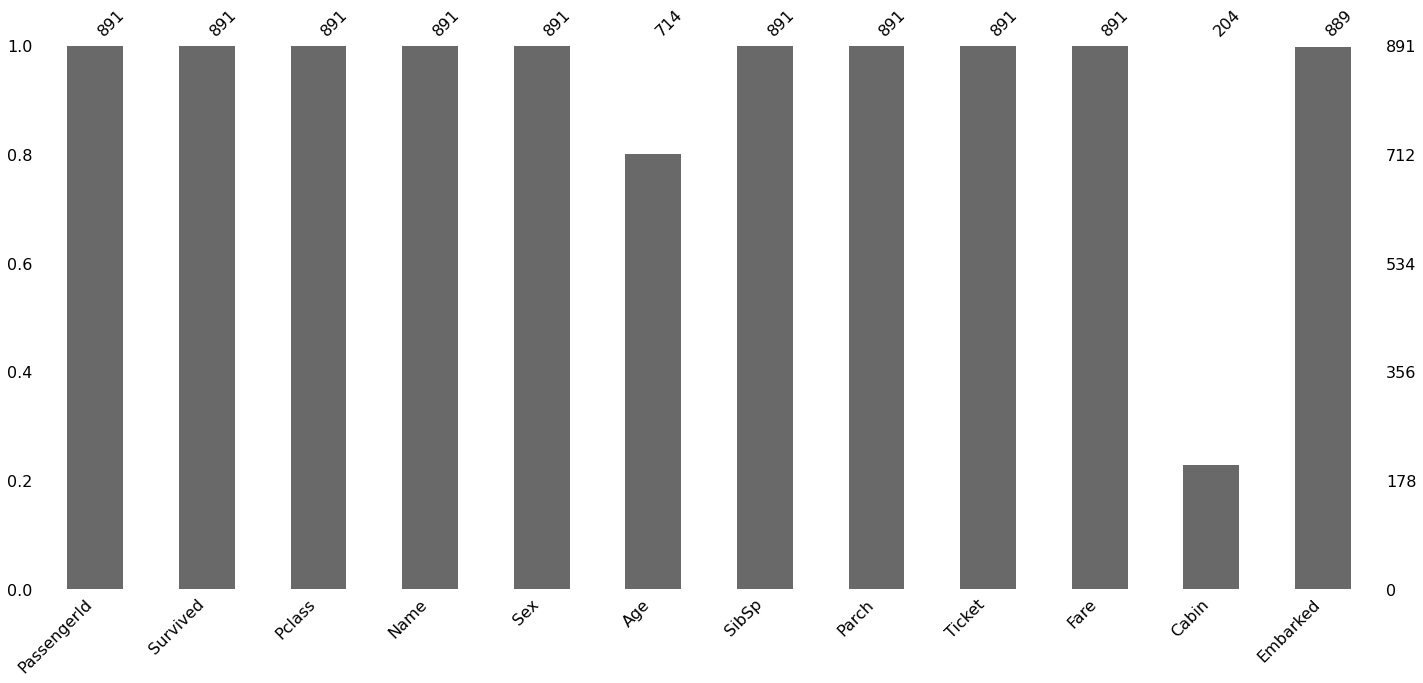

In [7]:
# bar chart

import missingno as msno
msno.bar(titanic.sample(891))

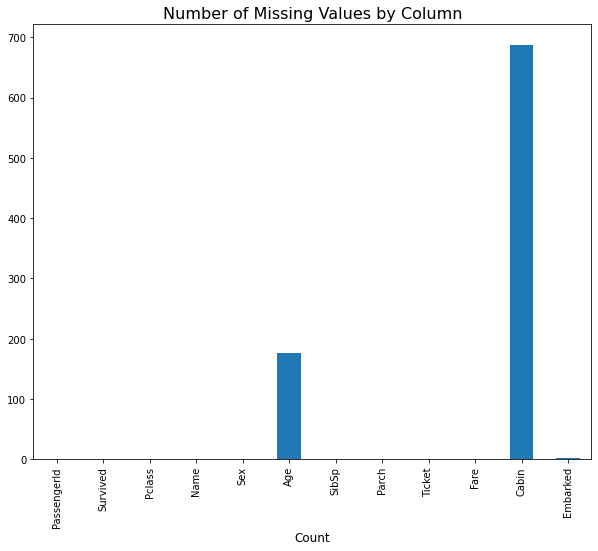

In [9]:
plt.figure(figsize = (10,8))
titanic.isnull().sum().plot(kind = 'bar')

plt.title('Number of Missing Values by Column', size = 16)
plt.xlabel('Count', size = 12);

## 2- Cabin has most NaN values

## 3- Delete all rows where `Embarked` is empty

In [10]:
titanic.dropna(subset=['Embarked'], how='all', inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### 4- Fill all empty cabins with **¯\\_(ツ)_/¯**

In [11]:
titanic1= titanic[['Cabin']].fillna( "**¯\\_(ツ)_/¯**")
titanic[['Cabin']]= titanic1
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Step 3: Feature extraction

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S


### 1- A new column called "FamilyCount" which will be the sum of "SibSp" and "Parch".

In [52]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,dummy_column,IsCapt,Class,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,Mrs,0,First,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss,0,Third,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,Mrs,0,First,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,**¯\_(ツ)_/¯**,1,0,0,1,0,1,Rev,0,Second,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1,1,0,Miss,0,First,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss,0,Third,3
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,0,0,0,1,Mr,0,First,0


## 2- A new column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [13]:
def is_reverend(string):
    strings = string.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0

In [14]:
titanic['IsReverend'] = titanic['Name'].apply(is_reverend)

In [15]:
titanic.IsReverend.tail(18)

873    0
874    0
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    1
887    0
888    0
889    0
890    0
Name: IsReverend, dtype: int64

In [ ]:
# df.loc[df['name'].str.contains('Rev.')]
#df['name'].str.contains('Rev.').astype()

## 3- Embarked categories into 1's and 0's

In [16]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,1


## Do the same thing for `Sex'

In [17]:
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,1,1,0


## - BONUS: Extract the title from everyone's name and create dummy columns

In [18]:
titanic['dummy_column'] = [n.split(',')[1].split('.')[0].strip() for n in titanic['Name']]

In [ ]:
#test = titanic['Name'][2]
#[n.split(',')[1].split('.')[0].strip() for n in titanic['Name']]

## Step 4: Exploratory analysis 

### 1. What was the survival rate overall?

In [19]:
survival_rate = titanic[titanic.columns[1]].sum()/len(titanic['Survived'])*100
print(f"The overall survival rate is {survival_rate}")

The overall survival rate is 38.24521934758155


In [ ]:
#df['survived'].mean()

In [ ]:
#df['survived'].value_counts(normalized=True)

### 2. Which gender fared the worst? What was their survival rate?

In [20]:
print(len(titanic.groupby('Fare')['Sex_female']))
print(len(titanic.groupby('Fare')['Sex_male']))

247
247


In [21]:
survival_rate_f = titanic[titanic.columns[15]].sum()/len(titanic['Sex_female'])*100
print(f"The overall survival rate of female  is {survival_rate_f}")

The overall survival rate of female  is 64.90438695163104


In [53]:
survival_rate_m = titanic[titanic.columns[16]].sum()/len(titanic['Sex_male'])*100
print(f"The overall survival rate of male is {survival_rate_m}")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [27]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,dummy_column
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss


### 3. What was the survival rate for each `Pclass`?

In [29]:
number_survivors = titanic[titanic.columns[1]].sum()
print(f"The total number of survivors was: {number_survivors}.")

The total number of survivors was: 340.


In [30]:
p_1 = [passenger == 1 for passenger in titanic.Pclass]
p_2 = [passenger == 2 for passenger in titanic.Pclass]
p_3 = [passenger == 3 for passenger in titanic.Pclass]


p_1_survival = [survived for index, survived in enumerate(titanic.Survived) if p_1[index]]
p_1_survival = np.array([p_1_survival])
p_1_survival_rate = (p_1_survival.sum() / number_survivors.sum()*100)
p_1_survival_rate
print(f"PClass 1 survival rate was: {p_1_survival_rate}%.")

PClass 1 survival rate was: 39.411764705882355%.


In [31]:
p_2_survival = [survived for index, survived in enumerate(titanic.Survived) if p_2[index]]
p_2_survival = np.array([p_2_survival])
p_2_survival_rate = (p_2_survival.sum() / number_survivors.sum()*100)
p_2_survival_rate
print('PClass 2 survival rate was: {}%'.format(p_2_survival_rate))

PClass 2 survival rate was: 25.588235294117645%


In [32]:
p_3_survival = [survived for index, survived in enumerate(titanic.Survived) if p_3[index]]
p_3_survival = np.array([p_3_survival])
p_3_survival_rate = (p_3_survival.sum() / number_survivors.sum() *100)
p_3_survival_rate
print('PClass 3 survival rate was: {}%'.format(p_3_survival_rate))

PClass 3 survival rate was: 35.0%


### 4- Did any reverends survive? How many?

In [33]:
survival = titanic.groupby("Survived")
survival.groups


{0: [0, 4, 5, 6, 7, 12, 13, 14, 16, 18, 20, 24, 26, 27, 29, 30, 33, 34, 35, 37, 38, 40, 41, 42, 45, 46, 48, 49, 50, 51, 54, 57, 59, 60, 62, 63, 64, 67, 69, 70, 71, 72, 73, 75, 76, 77, 80, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 129, 130, 131, 132, 134, 135, 137, 138, 139, 140, 143, 144, 145, 147, 148, 149, 150, 152, 153, ...], 1: [1, 2, 3, 8, 9, 10, 11, 15, 17, 19, 21, 22, 23, 25, 28, 31, 32, 36, 39, 43, 44, 47, 52, 53, 55, 56, 58, 65, 66, 68, 74, 78, 79, 81, 82, 84, 85, 88, 97, 98, 106, 107, 109, 123, 125, 127, 128, 133, 136, 141, 142, 146, 151, 156, 161, 165, 166, 172, 183, 184, 186, 187, 190, 192, 193, 194, 195, 198, 204, 207, 208, 209, 211, 215, 216, 218, 220, 224, 226, 230, 233, 237, 241, 247, 248, 255, 256, 257, 258, 259, 261, 267, 268, 269, 271, 272, 274, 275, 279, 283, ...]}

In [34]:
reverend_s = [survival == 1 for gender in titanic.IsReverend]
reverend_s = np.array([reverend_s])
reverend_s.sum()
print("No Reverends made it off the Titanic.")

No Reverends made it off the Titanic.


### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [35]:
survival_rate_by_cabin = titanic.groupby('Cabin')['Survived'].sum()/titanic.groupby('Cabin')['PassengerId'].count() * 100
survival_rate_by_cabin.filter(items=['¯\(ツ)/¯'])
#type(survival_rate_by_cabin)

Series([], dtype: float64)

### 6. What is the survival rate for people whose `Age` is empty?

In [36]:
age_new = [pd.isnull(x) for x in titanic.Age]
age_survival = [age for index, age in enumerate(titanic.Survived) if age_new[index]]
age_survival = np.array([age_survival])
age_survival_rate = (age_survival.sum() / number_survivors.sum() * 100)
print(f"Empty Age category survival rate was: {age_survival_rate}%.")

Empty Age category survival rate was: 15.294117647058824%.


### 7. What is the survival rate for each port of embarkation?

In [37]:
c_mask = [passenger == 1 for passenger in titanic.Embarked_C]
q_mask = [passenger == 1 for passenger in titanic.Embarked_Q]
s_mask = [passenger == 1 for passenger in titanic.Embarked_S]

c_survival = [c for index, c in enumerate(titanic.Survived) if c_mask[index]]
c_survival = np.array([c_survival])
c_survival_rate = (c_survival.sum() / number_survivors.sum()*100)

print(f"The survival rate for embarking from Cherbourg was: {c_survival_rate}%.")

The survival rate for embarking from Cherbourg was: 27.35294117647059%.


In [38]:
q_survival = [q for index, q in enumerate(titanic.Survived) if q_mask[index]]
q_survival = np.array([q_survival])
q_survival_rate = (q_survival.sum() / number_survivors.sum() * 100)

print(f"The survival rate for embarking from Queenstown was: {q_survival_rate}%.")

The survival rate for embarking from Queenstown was: 8.823529411764707%.


In [39]:
s_survival = [s for index, s in enumerate(titanic.Survived) if s_mask[index]]
s_survival = np.array([s_survival])
s_survival_rate = (s_survival.sum() / number_survivors.sum() * 100)

print(f"The survival rate for embarking from Southampton was: {s_survival_rate}%.")

The survival rate for embarking from Southampton was: 63.8235294117647%.


### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [40]:
titanic_new = titanic[titanic['Age'] < 12]
survival_rate_by_PClass_new = titanic_new.groupby('Pclass')['Survived'].sum()/titanic_new.groupby('Pclass')['PassengerId'].count() * 100
survival_rate_by_PClass_new

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

### 9. Did the captain of the ship survive? Is he on the list?

In [41]:
def captain_find(value):
    strings = value.split()
    if 'Smith' in str(strings):
        return 1
    else:
        return 0

titanic['IsCapt'] = titanic['Name'].map(captain_find)
titanic[titanic['IsCapt'] == 1]

print(f"It appears that Captain Edward John Smith was not in the list, he went down with the ship, per the Titanic Movie.")

It appears that Captain Edward John Smith was not in the list, he went down with the ship, per the Titanic Movie.


### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [42]:
titanic.head()
spend_ticket = titanic.sort_values(by=['Fare', 'Survived'], ascending=False)
spend_ticket.head(7)
print(f"The person who did not survive and paid the most was Mr. Charles Alexander Fortune, who turns out was not that \n fortunate.")

The person who did not survive and paid the most was Mr. Charles Alexander Fortune, who turns out was not that 
 fortunate.


### 11. Does having family on the boat help or hurt your chances of survival?

In [54]:
family_in = titanic.sort_values(by='FamilyCount', ascending=False)
family_in.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,dummy_column,IsCapt,Class,FamilyCount
324,325,0,3,"Sage, Mr. George John Jr",NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss,0,Third,10
201,202,0,3,"Sage, Mr. Frederick",NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third,10
846,847,0,3,"Sage, Mr. Douglas Bullen",NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third,10
792,793,0,3,"Sage, Miss. Stella Anna",NaN,8,2,CA. 2343,69.55,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss,0,Third,10


In [55]:
titanic_family = titanic[titanic['FamilyCount'] >= 1]
survival_rate_by_family = titanic.groupby('FamilyCount')['Survived'].sum()/titanic_family.groupby('FamilyCount')['PassengerId'].count() * 100
survival_rate_by_family


FamilyCount
0           NaN
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [56]:
titanic_no_family = titanic[titanic['FamilyCount'] < 1]
survival_rate_by_no_family = titanic_no_family.groupby('FamilyCount')['Survived'].sum()/titanic_no_family.groupby('FamilyCount')['PassengerId'].count() * 100
survival_rate_by_no_family

FamilyCount
0    30.093458
dtype: float64

## Step 5: Plotting 

### Charts showing the survival rates of different groups of people

/Users/tahir/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tahir/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


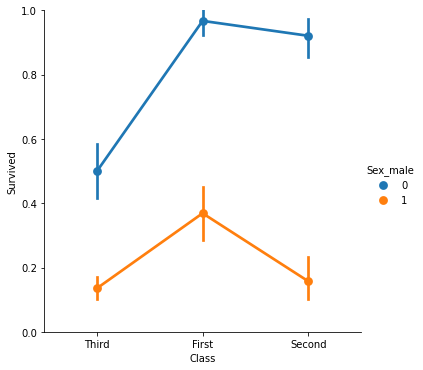

In [57]:
titanic["Class"] = titanic.Pclass.map({1: "First", 2: "Second", 3: "Third"})
sns.factorplot("Class", "Survived", data=titanic, hue="Sex_male").set(ylim=(0,1))

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,dummy_column,IsCapt,Class
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,Mrs,0,First
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,0,1,1,0,Miss,0,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,Mrs,0,First
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,1,0,1,Mr,0,Third


/Users/tahir/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tahir/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


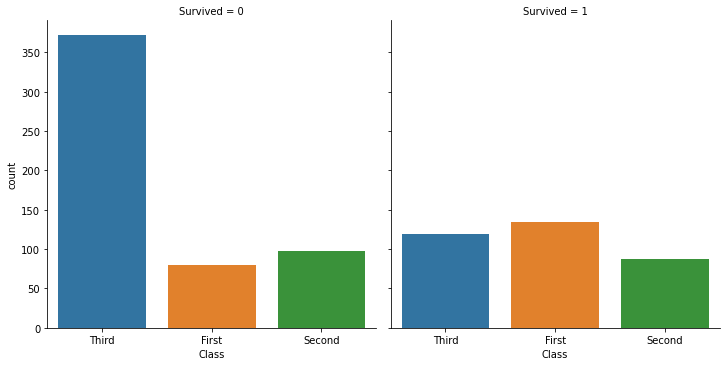

In [58]:
sns.factorplot(x="Class", col="Survived", data=titanic, kind="count",size=5, aspect=1)

<AxesSubplot:ylabel='Frequency'>

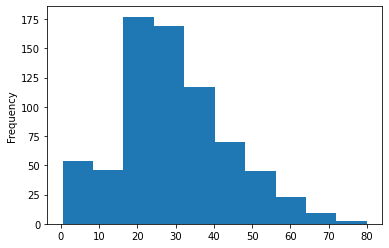

In [59]:
titanic['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

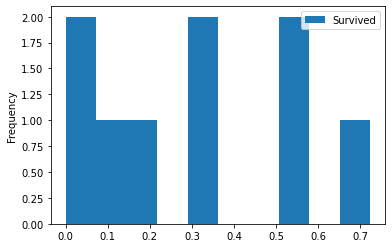

In [61]:
titanic.groupby(['FamilyCount'])[['Survived']].mean().plot(kind='hist')

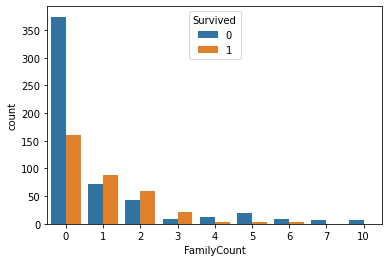

In [63]:
sns.countplot(x=titanic['FamilyCount'], hue=titanic['Survived']);